Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

ROC-AUC Score: 1.0


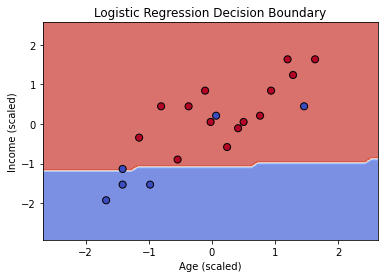

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Example Data: Age, Income, and whether the customer bought the product (1 = Yes, 0 = No)
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 25, 32, 42,
            28, 60, 40, 37, 30, 41, 50, 44, 58, 35],
    'Income': [25000, 30000, 50000, 60000, 48000, 65000, 70000, 35000, 55000, 52000,
               45000, 70000, 60000, 55000, 30000, 50000, 52000, 42000, 55000, 38000],
    'BoughtProduct': [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 
                      1, 1, 1, 1, 0, 1, 1, 1, 0, 1]  # 1 = Yes, 0 = No
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 3: Prepare the data
X = df[['Age', 'Income']]  # Features
y = df['BoughtProduct']  # Target variable

# Step 4: Scale the features to have a similar range (Standardize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Create a Logistic Regression model
model = LogisticRegression()

# Step 7: Train the model using the training data
model.fit(X_train, y_train)

# Step 8: Make predictions using the test data
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Output the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC Score: {roc_auc}")

# Step 10: Visualize the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title('Logistic Regression Decision Boundary')
plt.show()
